## Importing libraries

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

## Read data

In [3]:
df = pd.read_csv('./data/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.shape

(5728, 2)

In [5]:
df = df.drop_duplicates()
df = df.reset_index(inplace=False)[['text', 'spam']]
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# Clean Text

In [6]:
clean_text = []
stopwords = set(STOPWORDS)
for text in df.text:
    
    # Remove Subject:
    text = re.sub('Subject: ', '', text)
    
    # Remove Punctuation
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Remove extra spaces
    text = re.sub('\s+', ' ', text)
    
    # Lowering the text 
    text = text.lower()
      
    clean_text.append(text)

df['text'] = clean_text
df['text'].head()


0    naturally irresistible your corporate identity...
1    the stock trading gunslinger fanny is merrill ...
2    unbelievable new homes made easy im wanting to...
3     color printing special request additional inf...
4    do not have money get software cds from here s...
Name: text, dtype: object

In [7]:
df.shape

(5695, 2)

# Generate WordCloud

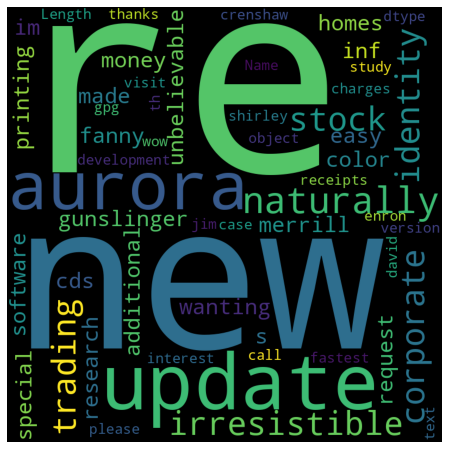

In [8]:
wordcloud = WordCloud(width=800, height=800, stopwords=stopwords, background_color='black', max_words=200, 
                      min_font_size=20).generate(str(df['text']))

# plot the wordcloud
fig = plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud.png', bbox_inches='tight')